<a href="https://colab.research.google.com/github/jeongwoo22/ESAA_assignments/blob/main/%EA%B3%BC%EC%A0%9C19_1205.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 합성곱 신경망(CNN)

1. 이미지 표현
- 흑백 : 0~255사이의 숫자로 각 픽셀의 화소 값 표현, 0은 검은색, 255는 흰색
- 컬러 : R, G, B 채널로 구성된 3장의 이미지를 하나로 결합해 표현, 0~255 사이의 숫자가 클수록 해당 색상을 강하게 표현

2. 합성곱
- 특성맵(feature map) : 합성곱 연산을 통해 추출된 이미지, 딥러닝 모델 학습에 사용시 성능 개선
- 오차 역전파(back propagation)시 커널의 가중치를 업데이트
- 공유 가중치(shared weights) : 오차 역전파시 커널의 그래디언트를 계산할 때 커널 사이즈에 대해서만 업데이트하면 되므로 완전 연결층을 사용할 때보다 연산량이 훨씬 적음


3. 채널
- 입력 이미지를 구성하는 2차원 배열의 개수

4. 스트라이드 
- 커널이 좌측 상단으로부터 입력 이미지를 기준으로 우측으로 이동하면서 합성곱 연산을 계속 수행하고 특성맵에 결과를 채워나갈 때 이동하는 간격

5. 패딩
- 추출된 특성맵의 크기가 입력 이미지 대비 줄어들지 않도록 패딩 설정

6. 특성맵 사이즈 
- Image Height, Image Width : 입력크기
- Kernel Height, Kernel Width : 필터 크기
- S : stride
- P : padding
- Output Height, Output Width : 출력 크기 

### 모델생성

In [1]:
# tensorflow 모듈 임포트
import tensorflow as tf

# mnist 데이터 로드
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_valid, y_valid) = mnist.load_data()

print(x_train.shape, y_train.shape) 
print(x_valid.shape, y_valid.shape)
     

11490434/11490434 [==============================] - 1s 0us/step
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


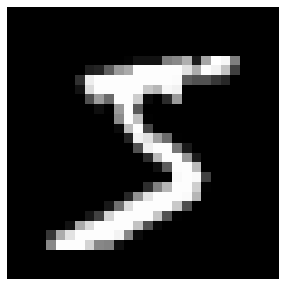

In [2]:
# 샘플 이미지 출력
import matplotlib.pyplot as plt

def plot_image(data, idx):
  plt.figure(figsize=(5,5))
  plt.imshow(data[idx], cmap='gray')
  plt.axis('off')
  plt.show()

plot_image(x_train, 0)
     

In [3]:
print(x_train.min(), x_train.max())
print(x_valid.min(), x_valid.max())

0 255
0 255


In [4]:
# 정규화
x_train = x_train/255.0
x_valid = x_valid/255.0

print(x_train.min(), x_train.max())
print(x_valid.min(), x_valid.max())

0.0 1.0
0.0 1.0


In [5]:
# 채널 추가
print(x_train.shape, x_valid.shape)

x_train_in = x_train[..., tf.newaxis]
x_valid_in = x_valid[..., tf.newaxis]

print(x_train_in.shape, x_valid_in.shape)

(60000, 28, 28) (10000, 28, 28)
(60000, 28, 28, 1) (10000, 28, 28, 1)


In [6]:
# Sequential API를 사용해 샘플 모델 생성
model = tf.keras.Sequential([
    # Convolution 적용(32 filters)
    tf.keras.layers.Conv2D(32, (3,3), activation='relu',
                           input_shape=(28,28,1), name='conv'),
    # Max Pooling 적용
    tf.keras.layers.MaxPooling2D((2,2), name='pool'),
    # Classifier 출력층
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation='softmax'),
])

In [7]:
# 모델 컴파일
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
# 모델 훈련
history = model.fit(x_train, y_train,
                    validation_data=(x_valid_in, y_valid),
                    epochs=10)

Epoch 1/10
1875/1875 [==============================] - 35s 18ms/step - loss: 0.2256 - accuracy: 0.9365 - val_loss: 0.0892 - val_accuracy: 0.9726
Epoch 2/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0833 - accuracy: 0.9760 - val_loss: 0.0658 - val_accuracy: 0.9794
Epoch 3/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0626 - accuracy: 0.9811 - val_loss: 0.0635 - val_accuracy: 0.9800
Epoch 4/10
1875/1875 [==============================] - 31s 17ms/step - loss: 0.0507 - accuracy: 0.9846 - val_loss: 0.0604 - val_accuracy: 0.9800
Epoch 5/10
1875/1875 [==============================] - 29s 16ms/step - loss: 0.0433 - accuracy: 0.9868 - val_loss: 0.0544 - val_accuracy: 0.9815
Epoch 6/10
1875/1875 [==============================] - 29s 16ms/step - loss: 0.0371 - accuracy: 0.9890 - val_loss: 0.0514 - val_accuracy: 0.9844
Epoch 7/10
1875/1875 [==============================] - 31s 17ms/step - loss: 0.0316 - accuracy: 0.9905 - val_loss: 0.0513 -

In [8]:
model.evaluate(x_valid_in, y_valid)
# 약 98%의 정확도
# 4 epoch 이후부터는 과대적합

313/313 [==============================] - 2s 6ms/step - loss: 0.0554 - accuracy: 0.9836


[0.055433373898267746, 0.9836000204086304]

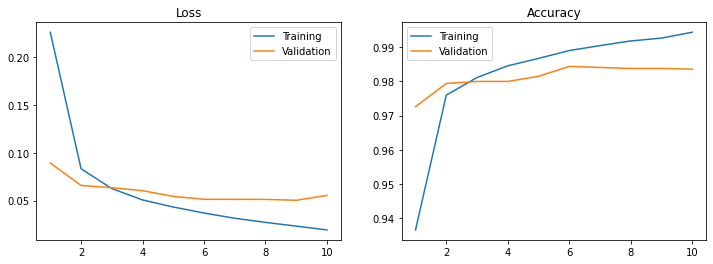

In [9]:
def plot_loss_acc(history, epoch):
    loss, val_loss = history.history['loss'], history.history['val_loss']
    acc, val_acc = history.history['accuracy'], history.history['val_accuracy']
    
    fig, axes = plt.subplots(1,2,figsize=(12,4))
    
    axes[0].plot(range(1, epoch+1), loss, label = 'Training')
    axes[0].plot(range(1, epoch+1), val_loss, label = "Validation")
    axes[0].legend(loc='best')
    axes[0].set_title('Loss')

    axes[1].plot(range(1, epoch+1), acc, label = 'Training')
    axes[1].plot(range(1, epoch+1), val_acc, label = "Validation")
    axes[1].legend(loc='best')
    axes[1].set_title('Accuracy')
    
    plt.show()
    
plot_loss_acc(history, 10)

#### 모델 구조 파악

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv (Conv2D)               (None, 26, 26, 32)        320       
                                                                 
 pool (MaxPooling2D)         (None, 13, 13, 32)        0         
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 10)                54090     
                                                                 
Total params: 54,410
Trainable params: 54,410
Non-trainable params: 0
_________________________________________________________________


In [11]:
# 입력 텐서 형태
model.input

<KerasTensor: shape=(None, 28, 28, 1) dtype=float32 (created by layer 'conv_input')>

In [12]:
# 출력 텐서 형태
model.output

<KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'dense')>

In [13]:
# 레이어
model.layers
# 파이썬 리스트 형태로 출력

In [14]:
# 첫번째 레이어 선택
model.layers[0]

In [15]:
# 첫번째 레이어 입력
model.layers[0].input

<KerasTensor: shape=(None, 28, 28, 1) dtype=float32 (created by layer 'conv_input')>

In [16]:
# 첫번째 레이어 출력
model.layers[0].output

<KerasTensor: shape=(None, 26, 26, 32) dtype=float32 (created by layer 'conv')>

In [17]:
#  첫번째 레이어의 가중치 행렬 추출
model.layers[0].weights

[<tf.Variable 'conv/kernel:0' shape=(3, 3, 1, 32) dtype=float32, numpy=
 array([[[[-1.53284267e-01, -1.80996343e-01, -9.51037556e-02,
            3.72191310e-01, -5.69542274e-02, -2.50794262e-01,
            1.82111010e-01, -6.33373559e-01, -1.16733599e+00,
           -5.92565835e-01,  6.41675174e-01, -7.81560898e-01,
            1.86176434e-01,  2.29929850e-01,  9.98736396e-02,
            1.96227595e-01,  1.65014461e-01,  3.51793140e-01,
            3.62121373e-01,  4.11862463e-01,  3.59826207e-01,
            3.77228886e-01, -2.48760626e-01, -9.30420458e-02,
           -1.22881830e+00, -1.24270640e-01, -5.75928688e-01,
           -6.70650363e-01,  3.84095848e-01, -7.27447867e-01,
            3.84810269e-01, -8.22591662e-01]],
 
         [[ 2.14513391e-01,  3.04179519e-01,  2.80919701e-01,
            8.53832588e-02,  6.71120286e-01, -2.44538248e-01,
            2.26523057e-01, -7.39996076e-01, -4.58603278e-02,
            1.01753160e-01,  6.21424675e-01,  3.51812452e-01,
           

In [18]:
# 첫번째 레이어 커널 가중치
model.layers[0].kernel

<tf.Variable 'conv/kernel:0' shape=(3, 3, 1, 32) dtype=float32, numpy=
array([[[[-1.53284267e-01, -1.80996343e-01, -9.51037556e-02,
           3.72191310e-01, -5.69542274e-02, -2.50794262e-01,
           1.82111010e-01, -6.33373559e-01, -1.16733599e+00,
          -5.92565835e-01,  6.41675174e-01, -7.81560898e-01,
           1.86176434e-01,  2.29929850e-01,  9.98736396e-02,
           1.96227595e-01,  1.65014461e-01,  3.51793140e-01,
           3.62121373e-01,  4.11862463e-01,  3.59826207e-01,
           3.77228886e-01, -2.48760626e-01, -9.30420458e-02,
          -1.22881830e+00, -1.24270640e-01, -5.75928688e-01,
          -6.70650363e-01,  3.84095848e-01, -7.27447867e-01,
           3.84810269e-01, -8.22591662e-01]],

        [[ 2.14513391e-01,  3.04179519e-01,  2.80919701e-01,
           8.53832588e-02,  6.71120286e-01, -2.44538248e-01,
           2.26523057e-01, -7.39996076e-01, -4.58603278e-02,
           1.01753160e-01,  6.21424675e-01,  3.51812452e-01,
           1.38115868e-01,  

In [19]:
# 샘플 이미지의 레이어별 출력을 리스트에 추가 (첫번째, 두번째 레이어)
activator = tf.keras.Model(inputs=model.input, outputs=[layer.output for layer in model.layers[:2]])
activations = activator.predict(x_train_in[0][tf.newaxis,...])
len(activations)

1/1 [==============================] - 0s 74ms/step


2

In [20]:
# 첫번째 레이어(conv) 출력층
conv_activation = activations[0]
conv_activation.shape

(1, 26, 26, 32)

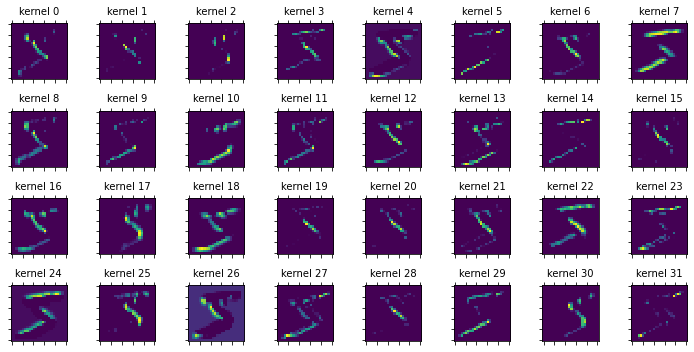

In [21]:
# Convolution 시각화
fig, axes = plt.subplots(4,8)
fig.set_size_inches(10,5)

for i in range(32):
    axes[i//8, i%8].matshow(conv_activation[0,:,:,i], cmap='viridis')
    axes[i//8, i%8].set_title('kernel %s'%str(i), fontsize=10)
    plt.setp(axes[i//8, i%8].get_xticklabels(), visible = False)
    plt.setp(axes[i//8, i%8].get_yticklabels(), visible = False)
    
plt.tight_layout()
plt.show()

In [22]:
# 두번째 레이어 출력층
pooling_activation = activations[1]
print(pooling_activation.shape)

(1, 13, 13, 32)


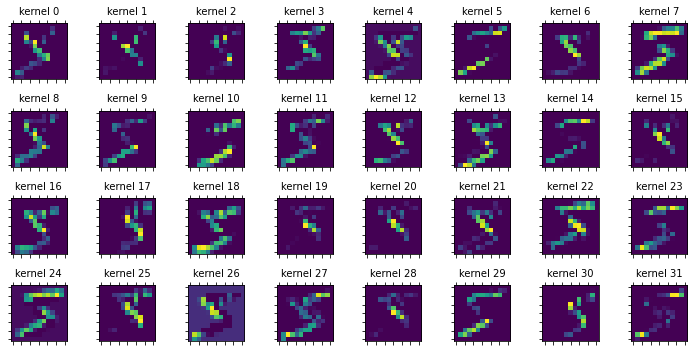

In [23]:
# 시각화
fig, axes = plt.subplots(4,8)
fig.set_size_inches(10,5)

for i in range(32):
    axes[i//8, i%8].matshow(pooling_activation[0,:,:,i], cmap='viridis')
    axes[i//8, i%8].set_title('kernel %s'%str(i), fontsize=10)
    plt.setp(axes[i//8, i%8].get_xticklabels(), visible = False)
    plt.setp(axes[i//8, i%8].get_yticklabels(), visible = False)
    
plt.tight_layout()
plt.show()